In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t, g = smp.symbols("t g")
m1, m2 = smp.symbols("m1 m2")
L1, L2 = smp.symbols("L1 L2")

In [3]:
the1, the2 = smp.symbols(r"\theta_1, \theta_2", cls=smp.Function)

In [4]:
the1

\theta_1

In [5]:
the1 = the1(t)
the2 = the2(t)

In [6]:
the1

\theta_1(t)

In [7]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [8]:
x1 = L1 * smp.sin(the1)
y1 = -L1 * smp.cos(the1)
x2 = L1 * smp.sin(the1) + L2 * smp.sin(the2)
y2 = -L1 * smp.cos(the1) - L2 * smp.cos(the2)

In [9]:
# Kinetic
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1 + T2
# Potential
V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2
# Lagrangian
L = T - V

In [10]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()
LE2

-L2*g*m2*sin(\theta_2(t)) - 1.0*L2*m2*(-L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L2*Derivative(\theta_2(t), (t, 2))) + 0.5*m2*(2*L2*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) - 2*L2*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t))

In [11]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)

In [12]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [13]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

In [14]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 2
m2 = 1
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g, m1, m2, L1, L2))

In [15]:
len(t[t<1])

25

In [16]:
ans

array([[  1.        ,  -3.        ,  -1.        ,   5.        ],
       [  0.87413906,  -3.31025173,  -0.78277685,   5.91440903],
       [  0.73333306,  -3.75998052,  -0.52139856,   7.24155048],
       ...,
       [ -0.88616579,   4.19459676,  12.25096793, -11.00398717],
       [ -0.70444762,   4.73165892,  11.77817817, -12.17998297],
       [ -0.52275734,   4.24973584,  11.32116145, -10.37241422]])

In [17]:
ans.T

array([[  1.        ,   0.87413906,   0.73333306, ...,  -0.88616579,
         -0.70444762,  -0.52275734],
       [ -3.        ,  -3.31025173,  -3.75998052, ...,   4.19459676,
          4.73165892,   4.24973584],
       [ -1.        ,  -0.78277685,  -0.52139856, ...,  12.25096793,
         11.77817817,  11.32116145],
       [  5.        ,   5.91440903,   7.24155048, ..., -11.00398717,
        -12.17998297, -10.37241422]])

In [18]:
the1 = ans.T[0]
the2 = ans.T[2]

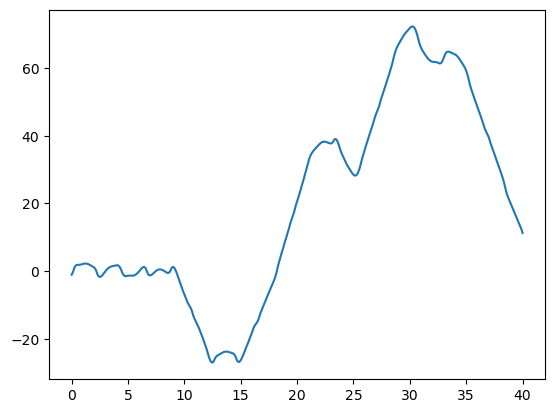

In [19]:
plt.plot(t, the2)

In [20]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1 * np.sin(the1),
           -L1 * np.cos(the1),
           L1 * np.sin(the1) + L2 * np.sin(the2),
           -L1 * np.cos(the1) - L2 * np.cos(the2))

x1, y1, x2, y2 =get_x1y1x2y2(t, ans.T[0],ans.T[2], L1, L2)

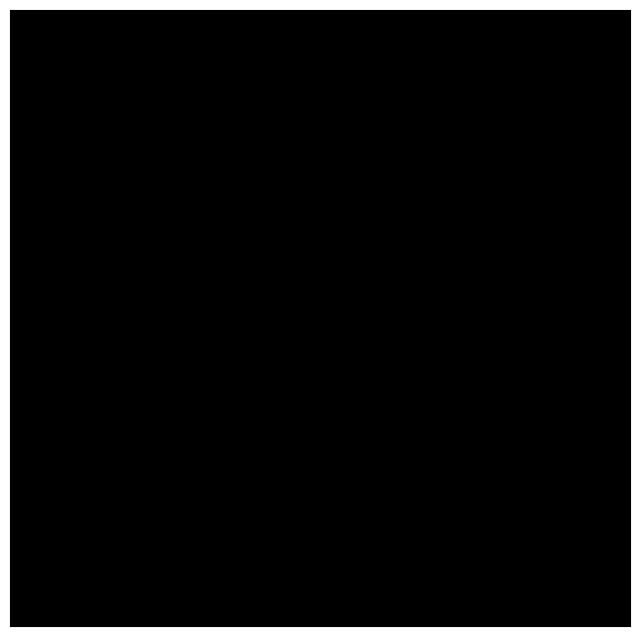

In [21]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i], [0, y1[i], y2[i]]])

fig,ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor("k")
ax.get_xaxis().set_ticks([]) # hide x axis ticks
ax.get_yaxis().set_ticks([]) # hide y axis ticks
ln1, = plt.plot([], [], "ro--", lw=3, markersize=8)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
plt.show()